In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import median_abs_deviation as MAD

from sklearn.cluster import KMeans

%reload_ext kedro.ipython
%reload_kedro

%matplotlib inline

[08/17/24 15:08:16] INFO     Registered line magic '%reload_kedro'                                   ]8;id=432799;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=901645;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=61499;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=607780;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=723665;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=773185;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predi                
                             ctions\goodreads-predictor.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/17/24 15:08:22] INFO     Kedro project goodreads-predictor                                      ]8;id=156827;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=558734;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=39141;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=513857;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[08/17/24 15:08:30] INFO     Registered line magic 'run_viz'                                        ]8;id=425245;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=997992;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

                    INFO     Resolved project path as:                                              ]8;id=139531;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=173866;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             C:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predi                
                             ctions\goodreads-predictor.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro project goodreads-predictor                                      ]8;id=773322;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=759356;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=520181;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=907853;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=381305;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=70717;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [3]:
data = catalog.load("filtered_books")
desc_embeddings = catalog.load("description_embeddings")

# Load color palette
color_gr_brown = catalog.load("params:color_gr_brown")
color_gr_purple = catalog.load("params:color_gr_purple")
color_gr_green = catalog.load("params:color_gr_green")
color_gr_tan_background = catalog.load("params:color_gr_tan_background")
coolors_dark_green = catalog.load("params:coolors_dark_green")
coolors_blue = catalog.load("params:coolors_blue")
coolors_dark_cyan = catalog.load("params:coolors_dark_cyan")
coolors_orange = catalog.load("params:coolors_orange")
coolors_yellow = catalog.load("params:coolors_yellow")

                    INFO     Loading data from filtered_books (ParquetDataset)...               ]8;id=165393;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=251965;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

[08/17/24 15:08:31] INFO     Loading data from description_embeddings (ParquetDataset)...       ]8;id=317743;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=313258;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:color_gr_brown (MemoryDataset)...         ]8;id=999866;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=505973;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:color_gr_purple (MemoryDataset)...        ]8;id=468320;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=639922;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:color_gr_green (MemoryDataset)...         ]8;id=582881;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=915728;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:color_gr_tan_background                   ]8;id=245866;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=193079;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from params:coolors_dark_green (MemoryDataset)...     ]8;id=837577;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=555021;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:coolors_blue (MemoryDataset)...           ]8;id=334592;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=641603;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:coolors_dark_cyan (MemoryDataset)...      ]8;id=685822;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=84632;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:coolors_orange (MemoryDataset)...         ]8;id=347799;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=721933;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:coolors_yellow (MemoryDataset)...         ]8;id=773041;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=866738;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [4]:
# Update the styling of the plots
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titlepad"] = 20
plt.rcParams["figure.facecolor"] = color_gr_tan_background

# EDA on Possible Features

## Number of Books Written by Authors
Bin this so it can be easily categorized by the user at inference

In [ ]:
mapping = ['1 - Few Books Written']

Mean of all values: 2.6675151129494115
Mean of values without ones: 5.419055649241146


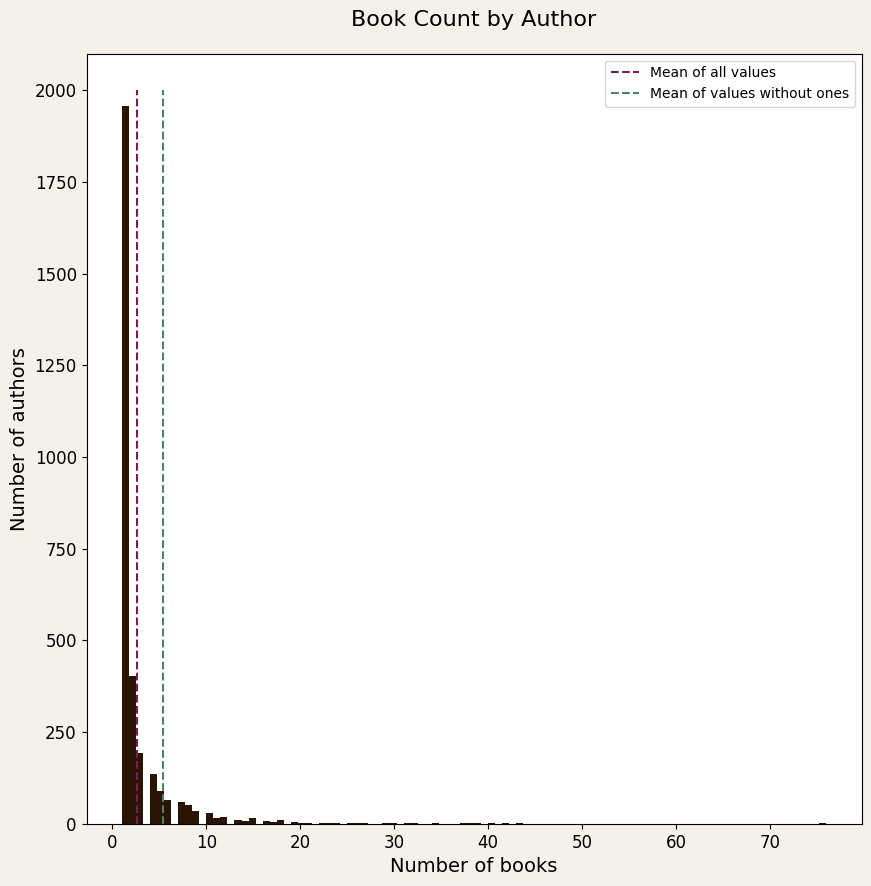

In [94]:
author_book_counts = pd.DataFrame(data.value_counts("most_common_author"))

true_mean = author_book_counts['count'].mean()
mean_above_one = author_book_counts.query('count > 1')['count'].mean()
print(f"Mean of all values: {true_mean}")
print(f"Mean of values without ones: {mean_above_one}")

fig = plt.figure(figsize = (10,10))
plt.hist(data.value_counts("most_common_author").values, bins=100, color=color_gr_brown)
plt.vlines(true_mean, 0, 2000, color=color_gr_purple, linestyles='dashed', label='Mean of all values')
plt.vlines(mean_above_one, 0, 2000, color=coolors_dark_green, linestyles='dashed', label='Mean of values without ones')
plt.legend()
plt.title("Book Count by Author")
plt.xlabel("Number of books")
plt.ylabel("Number of authors")

author_book_counts = author_book_counts.assign(book_count_category = lambda x: np.where(x['count'] < true_mean, "1 - Few Books Written",
                                                                                        np.where(x['count'] < mean_above_one, "2 - Some Books Written", "3 - Many Books Written"))).drop(columns='count')


Text(0, 0.5, 'Number of Authors')

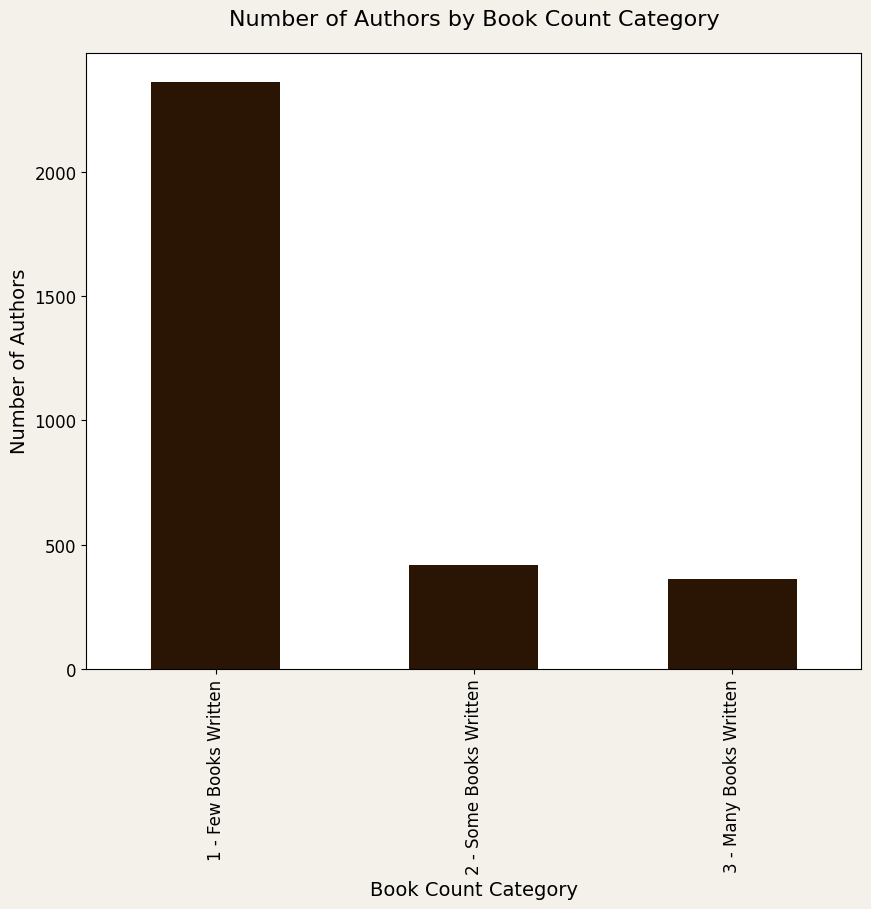

In [6]:
author_book_counts.value_counts('book_count_category').plot(kind='bar', color=color_gr_brown)
plt.title("Number of Authors by Book Count Category")
plt.xlabel("Book Count Category")
plt.ylabel("Number of Authors")

## Author Prevalence/Fame (Based on Relative Number of Reviews Given)
Assumes that the levels seen in this dataset are representative of the general population of authors and readers

In [7]:
# Use percentiles of the total review count to get a sense of how well-known an author is
author_fame_levels = (
    data
    # Get total review count by author
    .groupby("most_common_author")
    .agg(TotalReviews = ("ratings_count", "sum"))
    .sort_values("TotalReviews", ascending=False)

    # Get quantiles of the total review count (list comprehension to repeat the quantiles for each author)
    .assign(QuantileReviews = lambda x: [x['TotalReviews'].quantile([0, 0.15, 0.25, 0.5, 0.75, 0.95]).values.tolist() for _ in range(len(x))])

    # Explode the quantiles to get one row per quantile then sort by quantile
    .explode("QuantileReviews")
    .sort_values("QuantileReviews", ascending=True)

    # Create a quantile index for each author
    .assign(QuantileRank = lambda x: x.groupby("most_common_author").cumcount().add(1))

    # Filter to where the total review count is greater than the quantile review count or we are at the lowest quantile possible
    .assign(ReviewsDiff = lambda x: x['TotalReviews'] - x['QuantileReviews'])
    .assign(MaxReviewsDiff = lambda x: x.groupby("most_common_author")["ReviewsDiff"].transform("max"))
    .assign(AbsReviewsDiff = lambda x: abs(x["ReviewsDiff"]))
    .query("ReviewsDiff > 0 or MaxReviewsDiff <= 0")

    # Get the first row for each author (the lowest quantile where the total review count is greater)
    .sort_values("AbsReviewsDiff", ascending=True)
    .groupby("most_common_author")
    .first()

    # Map the quantile rank to a string ("Unknown", "Not Well-Known", "Well-Known", "Very Well-Known", "Famous")
    .assign(AuthorFameLevel = lambda x: x["QuantileRank"].map({1: "1 - Very Low Exposure", 2: "2 - Not Well-Known", 3: "3 - Well-Known",
                                                               4: "4 - Popular", 5:"5 - Semi-Famous", 6: "6 - Famous"}))
    .sort_values("TotalReviews", ascending=False)
    [['AuthorFameLevel']]
 )

Text(0, 0.5, 'Number of authors')

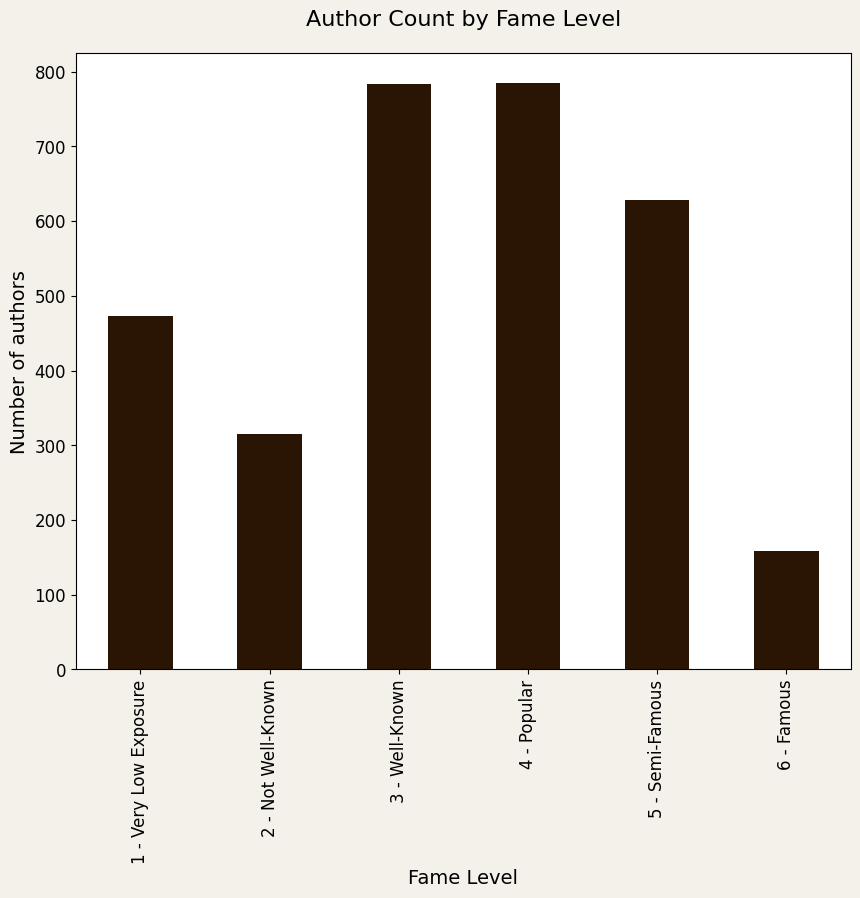

In [8]:
author_fame_levels.value_counts("AuthorFameLevel").sort_index().plot(kind='bar', color=color_gr_brown)
plt.title("Author Count by Fame Level")
plt.xlabel("Fame Level")
plt.ylabel("Number of authors")

In [9]:
author_counts = author_fame_levels.merge(author_book_counts, left_index=True, right_index=True)
pd.crosstab(author_counts.AuthorFameLevel, author_counts.book_count_category)

book_count_category,1 - Few Books Written,2 - Some Books Written,3 - Many Books Written
AuthorFameLevel,,,
1 - Very Low Exposure,472,1,0
2 - Not Well-Known,310,5,0
3 - Well-Known,740,44,0
4 - Popular,571,170,44
5 - Semi-Famous,243,169,216
6 - Famous,25,29,104


## Books Published by Publisher

In [10]:
publisher_book_counts = pd.DataFrame(data.value_counts("publisher"))
publisher_book_counts

,count
publisher,
Vintage,280
Penguin Books,211
Penguin Classics,138
Ballantine Books,132
Mariner Books,128
...,...
Hill & Wang Publ. (NY),1
Hill & Wang,1
Highbridge Audio,1


Mean of all values: 4.958013010053223
Mean of values without ones: 9.935914552736982


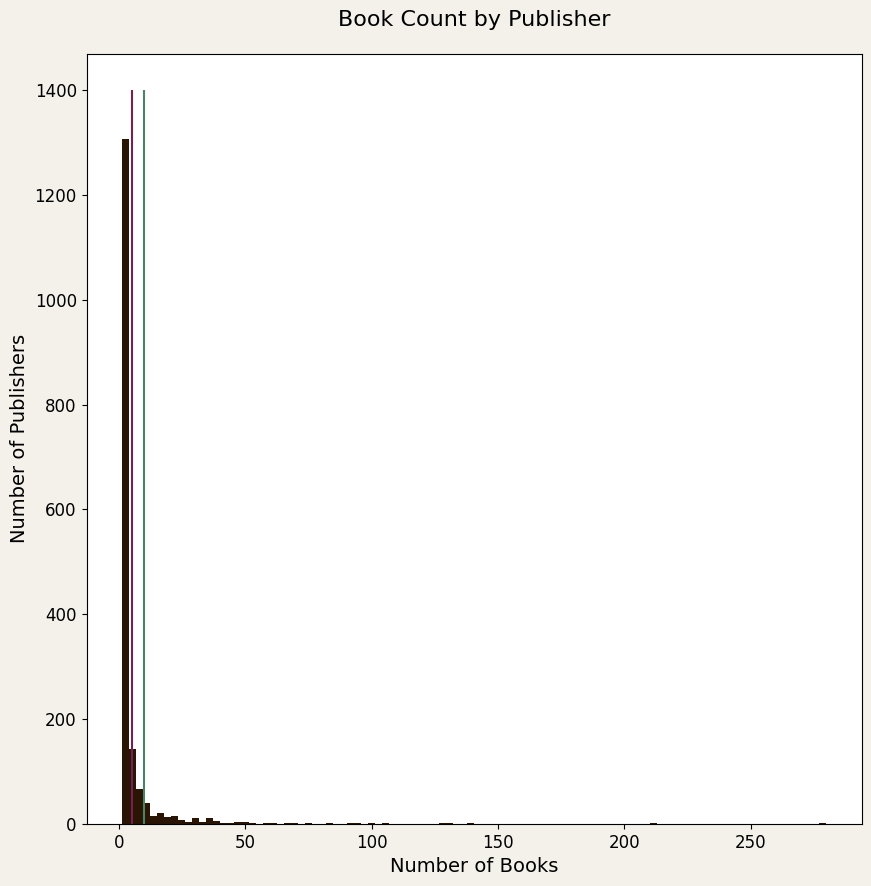

In [11]:
publisher_book_counts = pd.DataFrame(data.value_counts("publisher"))

true_mean = publisher_book_counts['count'].mean()
mean_above_one = publisher_book_counts.query('count > 1')['count'].mean()
print(f"Mean of all values: {true_mean}")
print(f"Mean of values without ones: {mean_above_one}")

fig = plt.figure(figsize = (10,10))
plt.hist(data.value_counts("publisher").values, bins=100, color=color_gr_brown)
plt.vlines(true_mean, 0, 1400, color=color_gr_purple)
plt.vlines(mean_above_one, 0, 1400, color=coolors_dark_green)
plt.title("Book Count by Publisher")
plt.xlabel("Number of Books")
plt.ylabel("Number of Publishers")

publisher_book_counts = publisher_book_counts.assign(book_count_category = lambda x: np.where(x['count'] < true_mean, "Few Publications",
                                                                                        np.where(x['count'] < mean_above_one, "Some Publications", "Many Publications"))).drop(columns='count')


Text(0, 0.5, 'Number of Publishers')

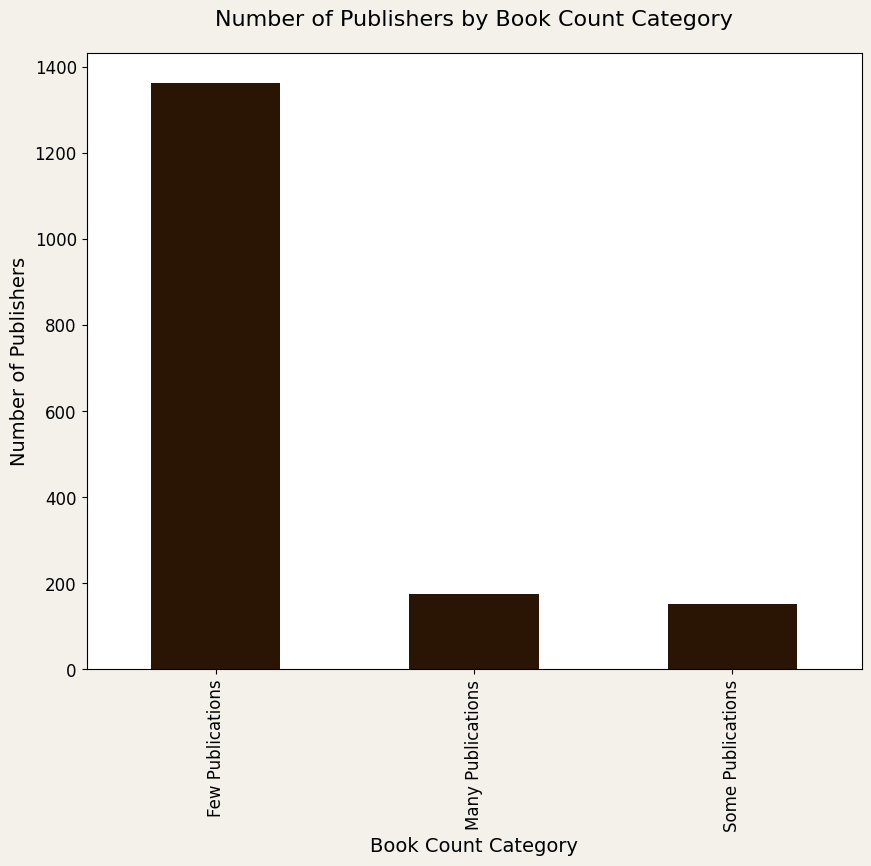

In [12]:
publisher_book_counts.value_counts('book_count_category').plot(kind='bar', color=color_gr_brown)
plt.title("Number of Publishers by Book Count Category")
plt.xlabel("Book Count Category")
plt.ylabel("Number of Publishers")

## Number of Authors Published by a Publishing Company
Use same methodology as above to determine the number of authors published by a publishing company using mean and mean without ones

Mean of all values: 3.6221170904790063
Mean of values without ones: 7.62780269058296


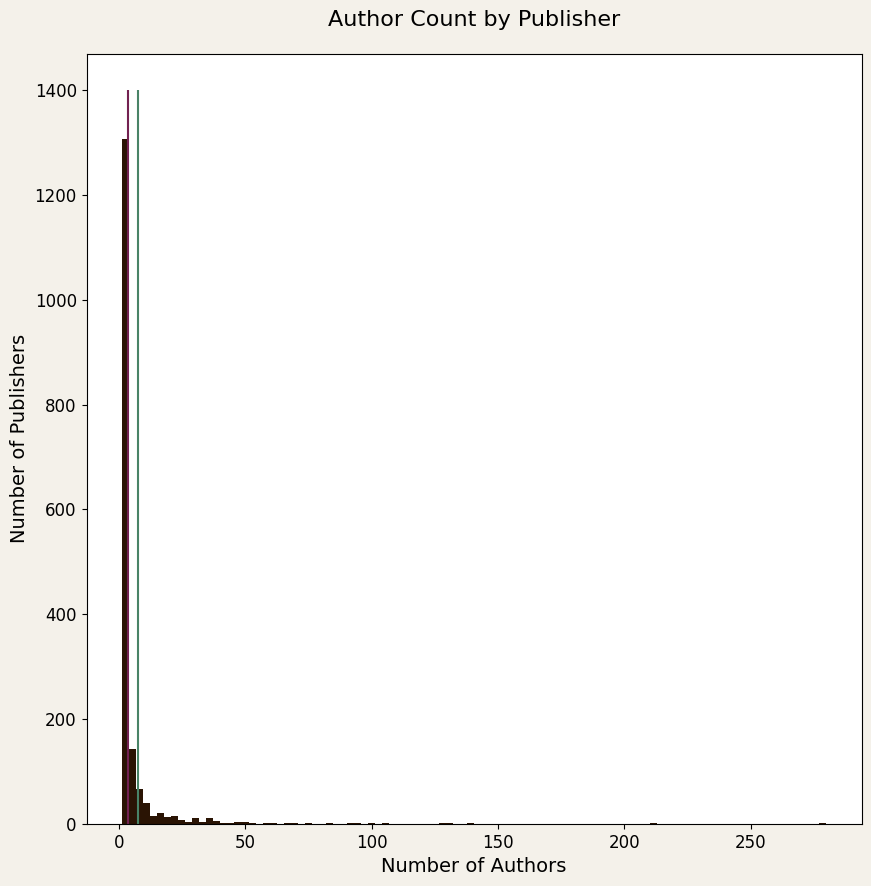

In [13]:
publisher_author_counts = data.groupby('publisher').agg(count = ('most_common_author', 'nunique')).sort_values('count', ascending=False)

true_mean = publisher_author_counts['count'].mean()
mean_above_one = publisher_author_counts.query('count > 1')['count'].mean()
print(f"Mean of all values: {true_mean}")
print(f"Mean of values without ones: {mean_above_one}")

fig = plt.figure(figsize = (10,10))
plt.hist(data.value_counts("publisher").values, bins=100, color=color_gr_brown)
plt.vlines(true_mean, 0, 1400, color=color_gr_purple)
plt.vlines(mean_above_one, 0, 1400, color=coolors_dark_green)
plt.title("Author Count by Publisher")
plt.xlabel("Number of Authors")
plt.ylabel("Number of Publishers")

publisher_author_counts = publisher_author_counts.assign(author_count_category = lambda x: np.where(x['count'] < true_mean, "Few Authors",
                                                                                                  np.where(x['count'] < mean_above_one, "Some Authors", "Many Authors"))).drop(columns='count')


Text(0, 0.5, 'Number of Publishers')

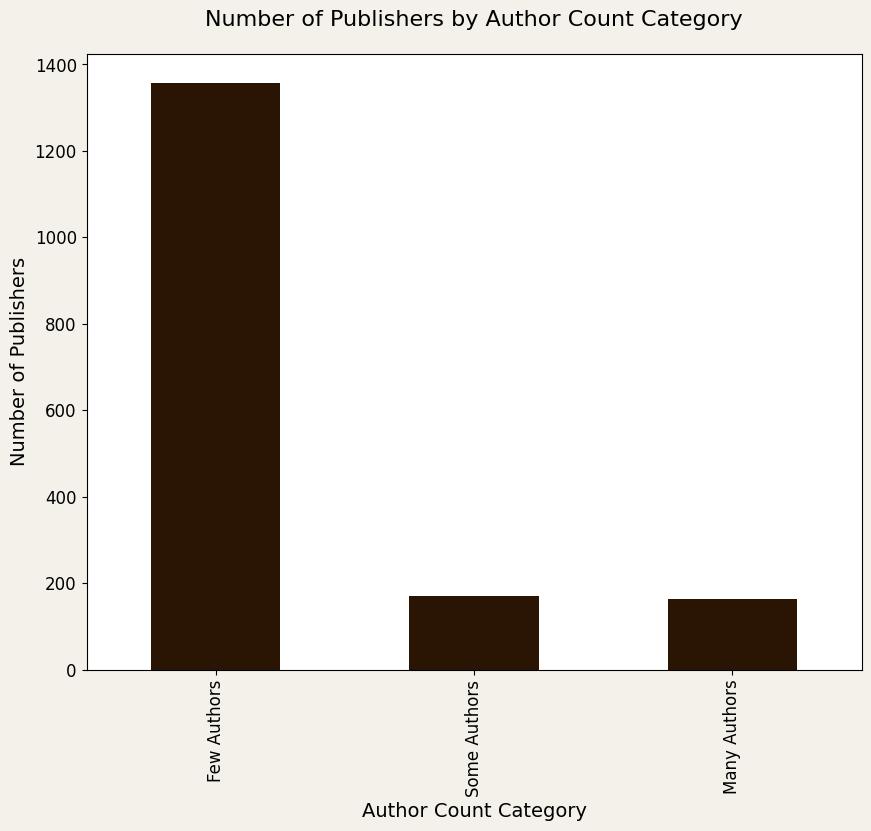

In [14]:
publisher_author_counts.value_counts('author_count_category').plot(kind='bar', color=color_gr_brown)
plt.title("Number of Publishers by Author Count Category")
plt.xlabel("Author Count Category")
plt.ylabel("Number of Publishers")

In [15]:
publisher_counts = publisher_book_counts.merge(publisher_author_counts, left_index=True, right_index=True)
pd.crosstab(publisher_counts.author_count_category, publisher_counts.book_count_category)

book_count_category,Few Publications,Many Publications,Some Publications
author_count_category,,,
Few Authors,1334,1,22
Many Authors,0,148,15
Some Authors,29,26,116


## Book Price by Publisher

Median of Median Prices: 16.99


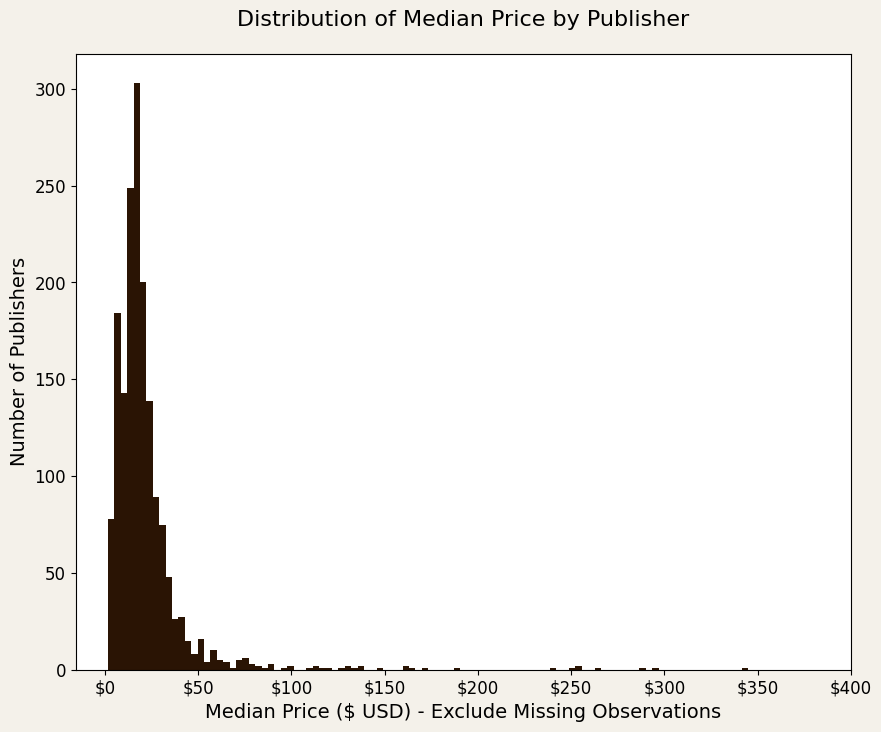

In [16]:
price_data = data.query('Price > 0').groupby('publisher').agg(MedianPrice = ('Price', 'median'))
median_of_medians = price_data['MedianPrice'].median()
print(f"Median of Median Prices: {median_of_medians}")
price_data['MedianPrice'].plot(kind='hist', bins=100, color=color_gr_brown)
plt.title("Distribution of Median Price by Publisher")
plt.xlabel("Median Price ($ USD) - Exclude Missing Observations")
plt.ylabel("Number of Publishers")
plt.xticks(ticks=plt.xticks()[0][1:], labels=['${:,.0f}'.format(x) for x in plt.xticks()[0][1:]])
plt.show()

price_data = price_data.assign(publisher_price_category = lambda x: np.where(x['MedianPrice'] < median_of_medians, "1 - Low Price Publisher", "2 - High Price Publisher")).drop(columns='MedianPrice')

Text(0, 0.5, 'Number of Publishers')

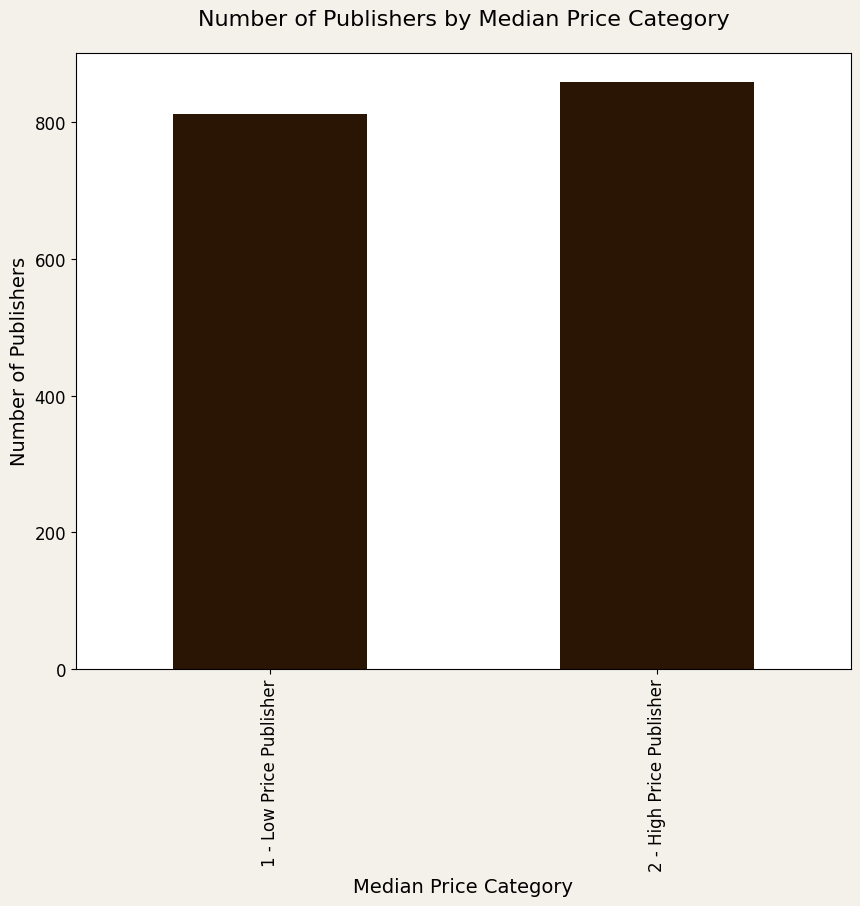

In [17]:
price_data.value_counts('publisher_price_category').sort_index().plot(kind='bar', color=color_gr_brown)
plt.title("Number of Publishers by Median Price Category")
plt.xlabel("Median Price Category")
plt.ylabel("Number of Publishers")

In [18]:
publisher_counts = publisher_counts.merge(price_data, left_index=True, right_index=True)
pd.crosstab(publisher_counts.author_count_category, publisher_counts.publisher_price_category)

publisher_price_category,1 - Low Price Publisher,2 - High Price Publisher
author_count_category,,
Few Authors,620,718
Many Authors,91,72
Some Authors,102,69


In [19]:
pd.crosstab(publisher_counts.book_count_category, publisher_counts.publisher_price_category)

publisher_price_category,1 - Low Price Publisher,2 - High Price Publisher
book_count_category,,
Few Publications,621,723
Many Publications,102,73
Some Publications,90,63


## Book Price Variation by Publisher
This does not look like it will be useful

Median of Median Prices: 0.0


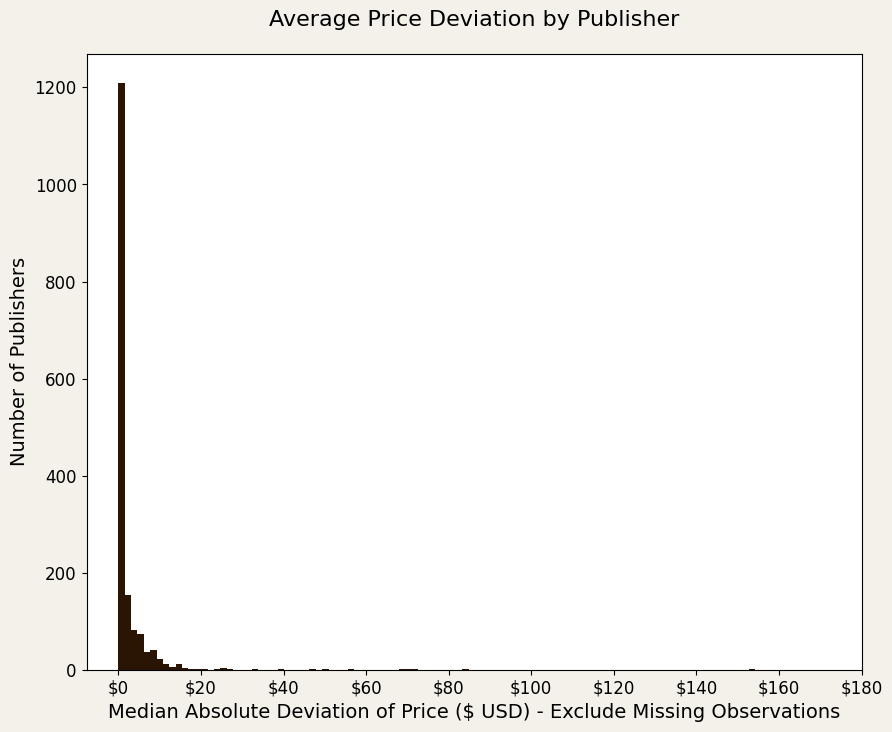

In [20]:
price_deviation_data = data.query('Price > 0').groupby('publisher').agg(PriceDeviation = ('Price', MAD))
median_deviation = price_deviation_data['PriceDeviation'].median()
print(f"Median of Median Prices: {median_deviation}")
price_deviation_data['PriceDeviation'].plot(kind='hist', bins=100, color=color_gr_brown)
plt.title("Average Price Deviation by Publisher")
plt.xlabel("Median Absolute Deviation of Price ($ USD) - Exclude Missing Observations")
plt.ylabel("Number of Publishers")
plt.xticks(ticks=plt.xticks()[0][1:], labels=['${:,.0f}'.format(x) for x in plt.xticks()[0][1:]])
plt.show()

price_deviation_data = price_deviation_data.assign(publisher_price_deviation_category = lambda x: np.where(x['PriceDeviation'] < median_of_medians, "1 - Low Price Variation", "2 - High Price Variation")).drop(columns='PriceDeviation')

## Genre Coverage by Publisher
Very few values above 10% (1 genre) but could be a good feature as it seems to encode some different information than other features

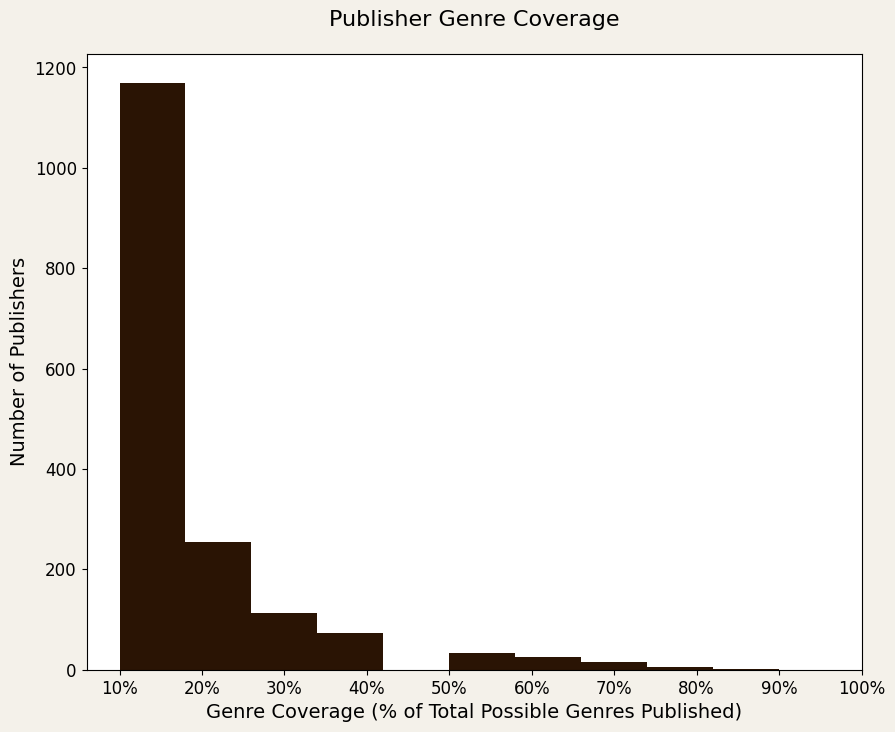

In [21]:
publisher_genre_coverage = (
    data
    .groupby('publisher')
    .agg(GenreCount = ('genre', 'nunique'))
    .assign(GenreCoverage = lambda x: x['GenreCount'] / data['genre'].nunique())
    .sort_values('GenreCount', ascending=False)
)
publisher_genre_coverage['GenreCoverage'].plot(kind='hist', bins=10, color=color_gr_brown)
plt.xticks(ticks=plt.xticks()[0][1:], labels=['{:,.0f}%'.format(x * 100) for x in plt.xticks()[0][1:]])
plt.title("Publisher Genre Coverage")
plt.xlabel("Genre Coverage (% of Total Possible Genres Published)")
plt.ylabel("Number of Publishers")
plt.show()

In [22]:
pd.crosstab(publisher_genre_coverage['GenreCoverage'], publisher_counts.book_count_category)

book_count_category,Few Publications,Many Publications,Some Publications
GenreCoverage,,,
0.1,1113,10,27
0.2,197,17,40
0.3,32,29,52
0.4,2,44,28
0.5,0,28,5
0.6,0,25,1
0.7,0,15,0
0.8,0,5,0
0.9,0,2,0


In [23]:
pd.crosstab(publisher_genre_coverage['GenreCoverage'], publisher_counts.author_count_category)

author_count_category,Few Authors,Many Authors,Some Authors
GenreCoverage,,,
0.1,1115,8,27
0.2,190,12,52
0.3,32,24,57
0.4,1,44,29
0.5,0,28,5
0.6,0,25,1
0.7,0,15,0
0.8,0,5,0
0.9,0,2,0


## Book-Level: Percentage of Text Reviews

Text Review Percentage IQR Quantiles:
 0.25    0.034372
0.50    0.059577
0.75    0.096154
Name: text_reviews_percentage, dtype: float64


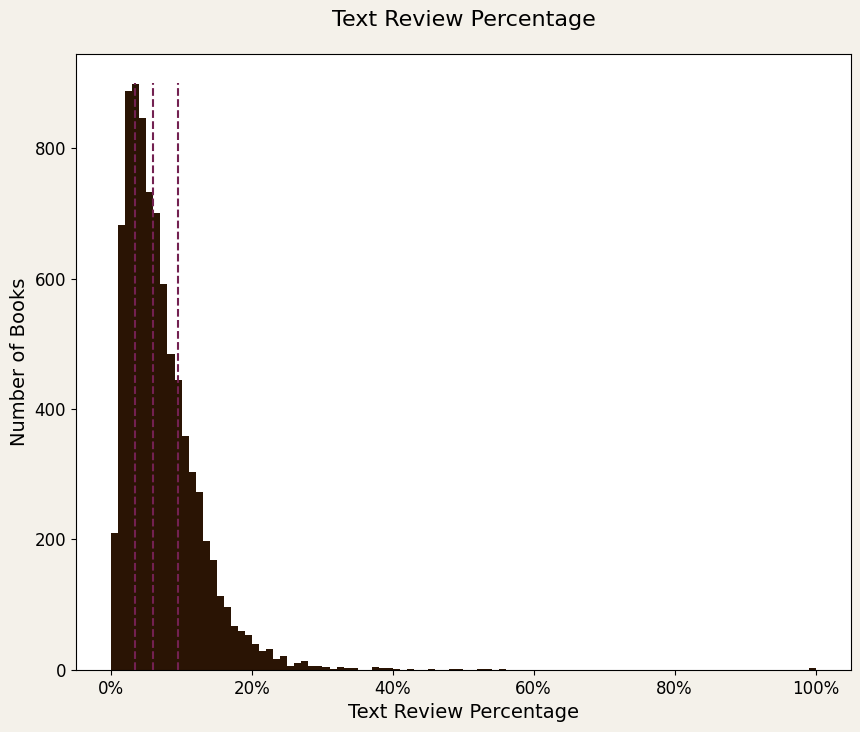

In [133]:
data['text_reviews_percentage'] = data['text_reviews_count'] / data['ratings_count']
data['text_reviews_percentage'].plot(kind='hist', bins=100, color=color_gr_brown)
print("Text Review Percentage IQR Quantiles:\n " + str(data['text_reviews_percentage'].quantile([0.25, 0.5, 0.75])))
plt.title("Text Review Percentage")
plt.xlabel("Text Review Percentage")
plt.ylabel("Number of Books")

quantiles = data['text_reviews_percentage'].quantile([0.25, 0.5, 0.75])
plt.vlines(quantiles, 0, 900, color=color_gr_purple, linestyles='dashed', label='IQR Quantile Cutoffs')
plt.xticks(ticks=plt.xticks()[0][1:-1], labels=['{:,.0f}%'.format(x * 100) for x in plt.xticks()[0][1:-1]])
data['text_reviews_percentage_category'] = np.where(data['text_reviews_percentage'] <= quantiles[0.25], "1 - Passive Reviewers",
                                                    np.where(data['text_reviews_percentage'] <= quantiles[0.5], "2 - Standard Reviewers",
                                                             np.where(data['text_reviews_percentage'] <= quantiles[0.75], "3 - Engaged Reviewes", '4 - Highly Engaged Reviewers')))

## Create a Price Tier Using 1-Dimensional k-means Clustering

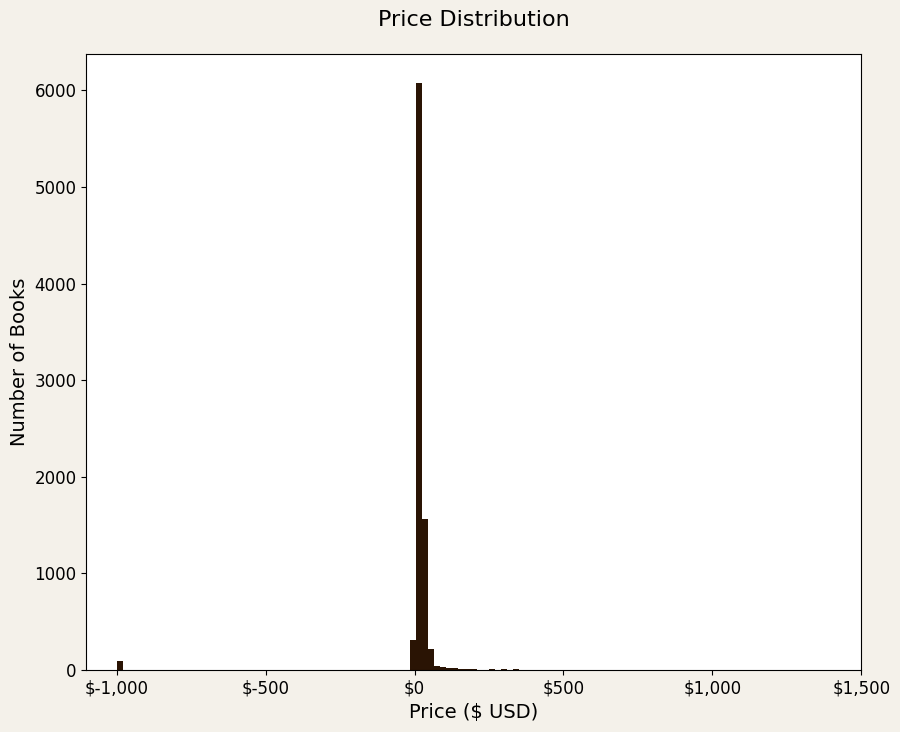

In [44]:
data['Price'].plot(kind='hist', bins=100, color=color_gr_brown)
plt.title("Price Distribution")
plt.xlabel("Price ($ USD)")
plt.ylabel("Number of Books")
plt.xticks(ticks=plt.xticks()[0][1:], labels=['${:,.0f}'.format(x) for x in plt.xticks()[0][1:]])
plt.show()

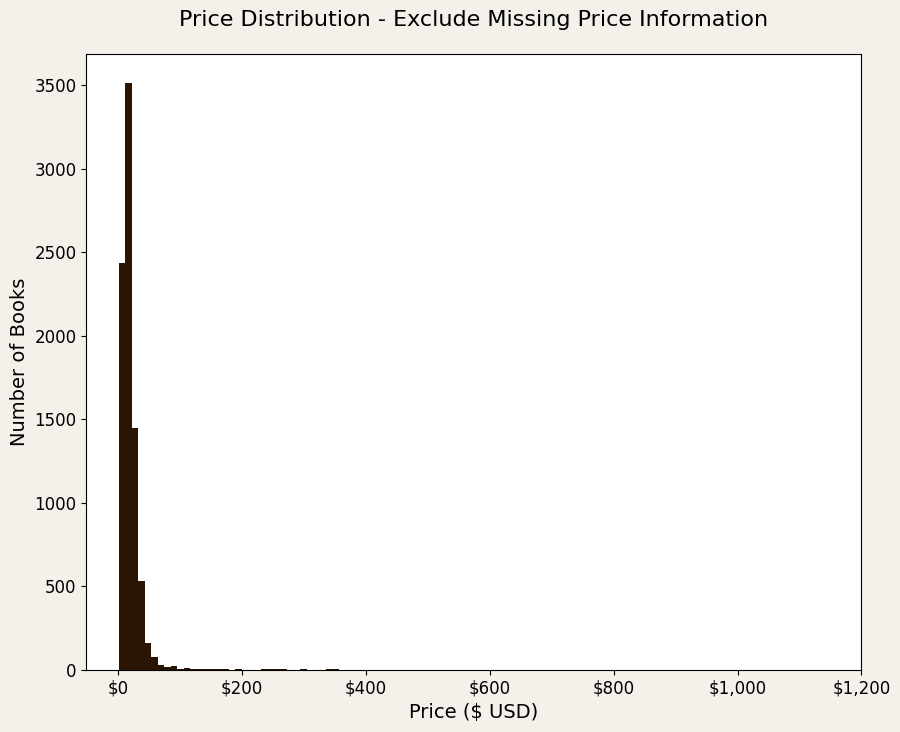

In [45]:
data.query("Price > 0")['Price'].plot(kind='hist', bins=100, color=color_gr_brown)
plt.title("Price Distribution - Exclude Missing Price Information")
plt.xlabel("Price ($ USD)")
plt.ylabel("Number of Books")
plt.xticks(ticks=plt.xticks()[0][1:], labels=['${:,.0f}'.format(x) for x in plt.xticks()[0][1:]])
plt.show()

In [30]:
var = 'Price'
scores = []
k_vals = list(range(1, 11))
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=123).fit(data[[var]])
    scores.append(kmeans.inertia_)

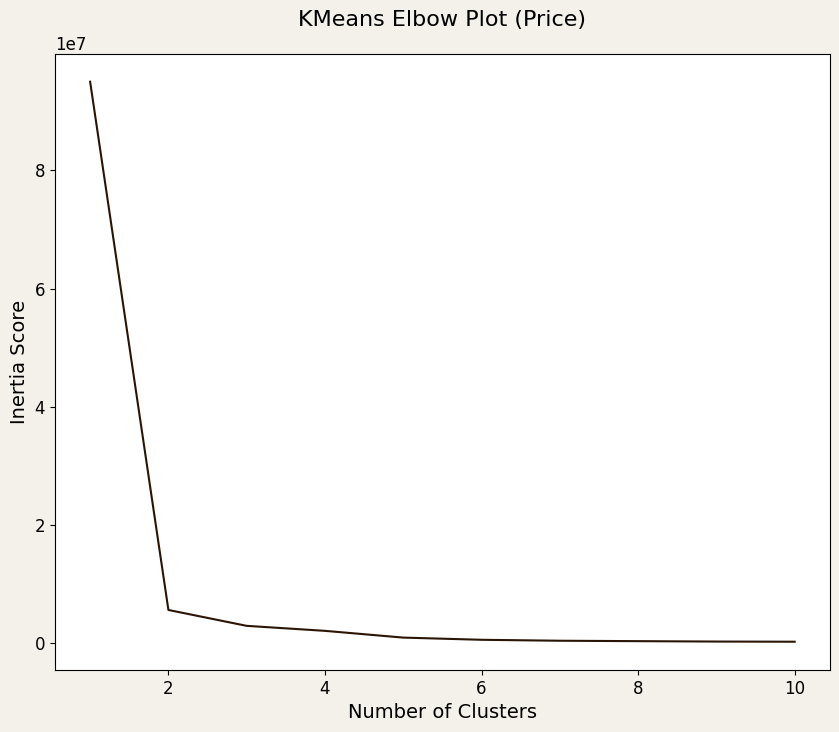

In [39]:
plt.plot(k_vals, scores, color=color_gr_brown)
plt.title("KMeans Elbow Plot (Price)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Score")
plt.show()

In [40]:
data['PriceCategory'] = KMeans(n_clusters=3, random_state=123).fit_predict(data[['Price']])

In [48]:
# These are very unbalanced. Probably not best to use this as a feature itself but potentially use the min and max as boundaries for outliers
data.groupby("PriceCategory").agg(MedianPrice = ('Price', 'median'), MinPrice = ('Price', 'min'), MaxPrice = ('Price', 'max'), Count = ('Price', 'count'))

,MedianPrice,MinPrice,MaxPrice,Count
PriceCategory,,,,
0,16.000000,1.0,137.876667,8251
1,-999.000000,-999.0,-999.000000,87
2,207.126667,140.0,1047.295000,46


## Review Count Tier
Similar strategy with 1-d Kmeans

In [51]:
var = 'ratings_count'
scores = []
k_vals = list(range(1, 11))
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=123).fit(data[[var]])
    scores.append(kmeans.inertia_)

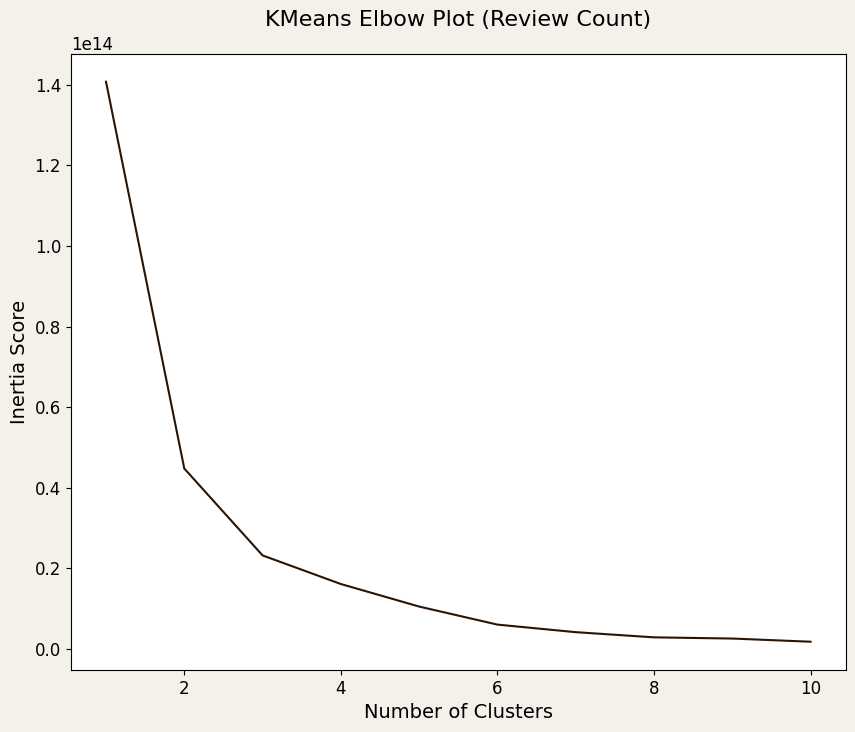

In [52]:
plt.plot(k_vals, scores, color=color_gr_brown)
plt.title("KMeans Elbow Plot (Review Count)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Score")
plt.show()

In [57]:
data['ReviewCluster'] = KMeans(n_clusters=6, random_state=123).fit_predict(data[[var]])


# This also doesn't seem to be working that well. Even has a cluster with only 1 observation...
data.groupby("ReviewCluster").agg(Median = (var, 'median'), Min = (var, 'min'), Max = (var, 'max'), Count = (var, 'count')).sort_values('Min')

,Median,Min,Max,Count
ReviewCluster,,,,
0,1448.0,1,92597,8015
2,155184.0,93589,370331,282
5,557397.0,382146,887554,54
1,1300920.0,980208,1766864,21
3,2153167.0,1895057,2530894,11
4,4597666.0,4597666,4597666,1


## Page Count Tier
Last attempt with 1d K-means clustering

In [60]:
var = 'num_pages'
scores = []
k_vals = list(range(1, 11))
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=123).fit(data[[var]])
    scores.append(kmeans.inertia_)

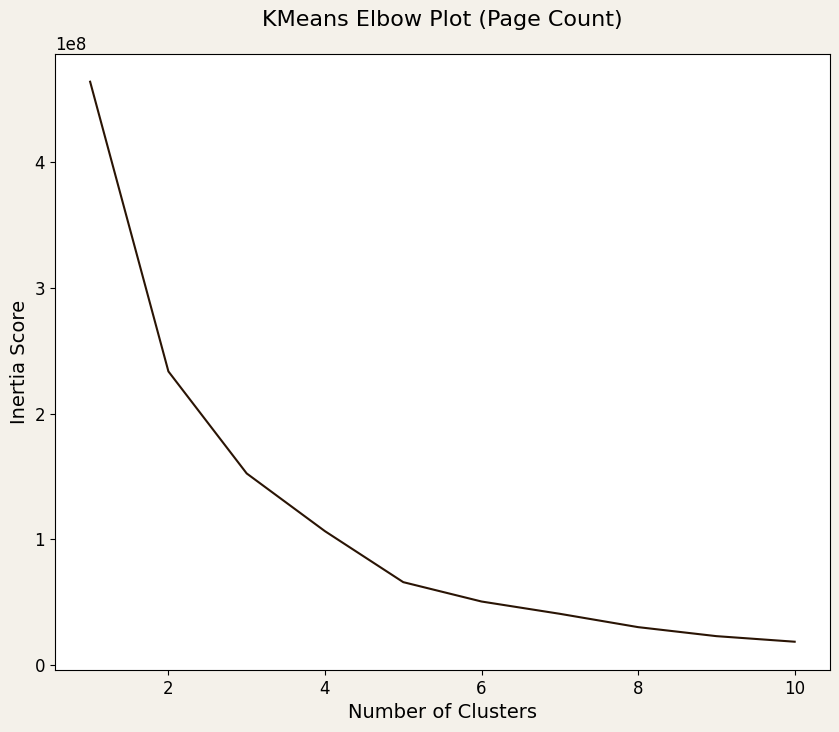

In [62]:
plt.plot(k_vals, scores, color=color_gr_brown)
plt.title("KMeans Elbow Plot (Page Count)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Score")
plt.show()

In [86]:
data['PageCountCluster'] = KMeans(n_clusters=4, random_state=123).fit_predict(data[[var]])


# This actually seems to have found something worthwhile. We can create a feature for this
category_mapping = data.groupby("PageCountCluster").agg(Median = (var, 'median'), Min = (var, 'min'), Count = (var, 'count')).sort_values('Min')
category_mapping['PageCountCategory'] = ['1 - Short Stories (1-271 pages)', '2 - Standard Books (272-524 pages)',
                                         '3 - Long Books (525 - 1049 pages)', '4 - Very Long Books (1050+ pages)']
category_mapping

,Median,Min,Count,PageCountCategory
PageCountCluster,,,,
3,192.0,1.0,3402,1 - Short Stories (1-271 pages)
0,357.0,272.0,3837,2 - Standard Books (272-524 pages)
1,641.0,527.0,1023,3 - Long Books (525 - 1049 pages)
2,1229.0,1050.0,122,4 - Very Long Books (1050+ pages)


Text(0.5, 0, 'Number of Books')

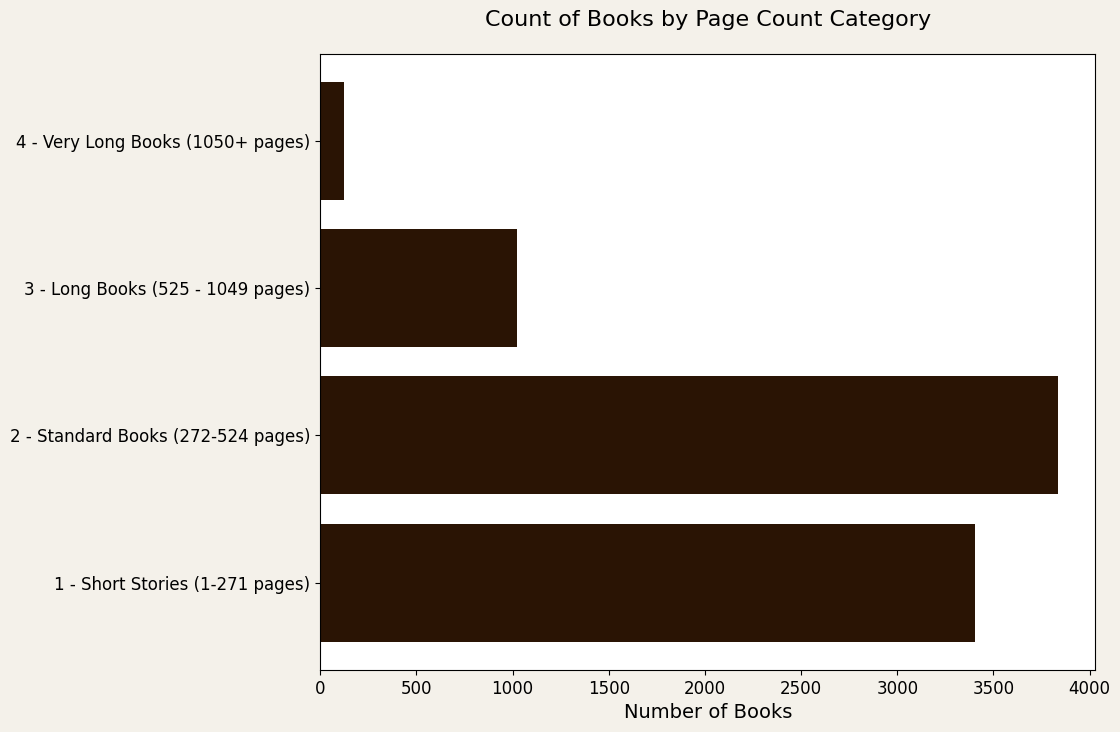

In [73]:
plt.barh(category_mapping['PageCountCategory'], category_mapping['Count'], color=color_gr_brown)
plt.title("Count of Books by Page Count Category")
plt.xlabel("Number of Books")

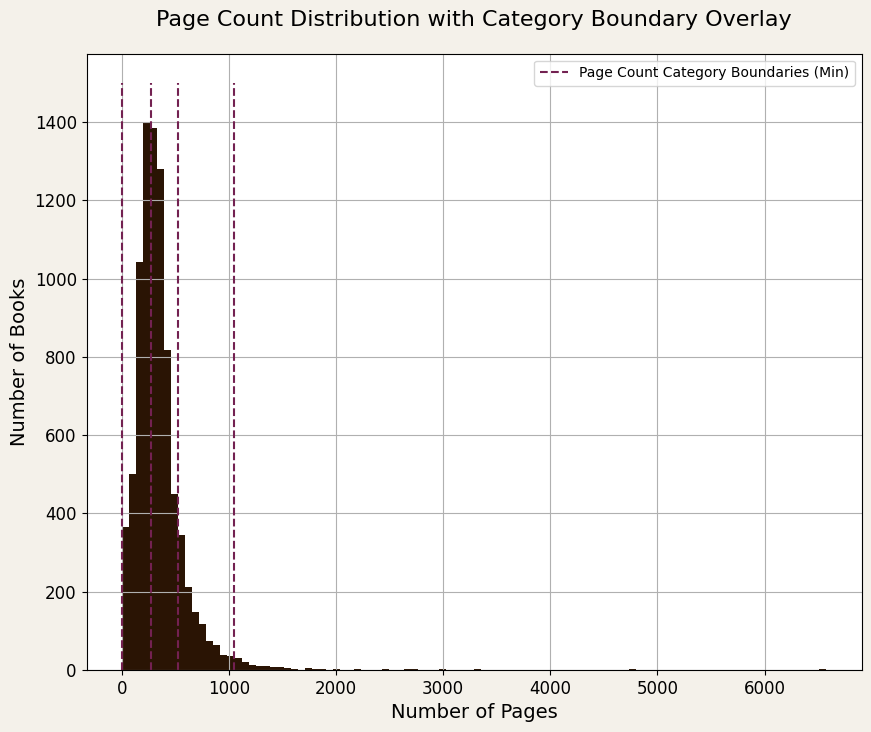

In [85]:
data['num_pages'].hist(bins=100, color=color_gr_brown)
plt.title("Page Count Distribution with Category Boundary Overlay")
plt.xlabel("Number of Pages")
plt.ylabel("Number of Books")
plt.vlines(category_mapping['Min'], 0, 1500, color=color_gr_purple, linestyles='dashed', label='Page Count Category Boundaries (Min)')
plt.legend()
plt.show()

## Clean up Language Codes

In [91]:
# English has multiple instances. Consolidate these
data['language_code_clean'] = np.where(data['language_code'].isin(['eng', 'en-US', 'en-GB', 'en-CA']), 'eng', data['language_code'])

In [92]:
data.value_counts(['language_code', 'language_code_clean'])


language_code  language_code_clean
eng            eng                    6874
en-US          eng                    1136
en-GB          eng                     148
spa            spa                     115
fre            fre                      45
ger            ger                      23
mul            mul                      11
en-CA          eng                       7
jpn            jpn                       6
ita            ita                       3
enm            enm                       3
grc            grc                       3
rus            rus                       2
lat            lat                       2
swe            swe                       1
ale            ale                       1
nor            nor                       1
nl             nl                        1
ara            ara                       1
tur            tur                       1
Name: count, dtype: int64

In [136]:
author_fame_levels

,AuthorFameLevel
most_common_author,
J.K. Rowling,6 - Famous
J.R.R. Tolkien,6 - Famous
Stephenie Meyer,6 - Famous
Stephen King,6 - Famous
Dan Brown,6 - Famous
...,...
Isabel Sharpe,1 - Very Low Exposure
G. Tubach,1 - Very Low Exposure
Monte Cook,1 - Very Low Exposure
